In [3]:
import pandas as pd
import geopandas as gpd

In [6]:
waerme_linien = gpd.read_file('/Users/sven/Documents/mshack23-waermeplanung/data_science/data_sven/waermelinien.geojson')
waerme_linien

WLD_ID     RW_WW_WBED    RW_WW_WLD       gn        kn  Shape_Leng  \
0      1018978       0.000000     0.000000  Münster  05515000  273.967135   
1      1018979  151404.528869  2798.671500  Münster  05515000   54.098714   
2      1019092       0.000000     0.000000  Münster  05515000   91.096859   
3      1019272  182216.869745   995.146910  Münster  05515000  183.105497   
4      1020765  136693.954936   598.286836  Münster  05515000  228.475619   
...        ...            ...          ...      ...       ...         ...   
13746  1164676       0.000000     0.000000  Münster  05515000  209.850623   
13747  1166275   61346.191354   259.085548  Münster  05515000  236.779673   
13748  1166276   18267.459256    90.124079  Münster  05515000  202.692326   
13749  1166942  180179.997928   296.440636  Münster  05515000  607.811399   
13750  1166943       0.000000     0.000000  Münster  05515000   78.661145   

                                                geometry  
0      MULTILINESTRING ((7.61035 51.84217, 7.60945 51...  
1      MULTILINESTRING ((7.61035 51.84217, 7.61028 51...  
2      MULTILINESTRING ((7.61165 51.84231, 7.61151 51...  
3      MULTILINESTRING ((7.60097 51.84245, 7.60098 51...  
4      MULTILINESTRING ((7.61265 51.84427, 7.61244 51...  
...                                                  ...  
13746  MULTILINESTRING ((7.59968 52.05448, 7.59980 52...  
13747  MULTILINESTRING ((7.59202 52.05728, 7.59185 52...  
13748  MULTILINESTRING ((7.59202 52.05728, 7.59217 52...  
13749  MULTILINESTRING ((7.59432 52.05841, 7.59483 52...  
13750  MULTILINESTRING ((7.59432 52.05841, 7.59461 52...  

[13751 rows x 7 columns]

In [8]:
waerme_netz = gpd.read_file('/Users/sven/Documents/mshack23-waermeplanung/data/district_heating_münster_raw.geojson')
waerme_netz

fid  DN                                           geometry
0    1   0  POLYGON ((7.64625 51.99635, 7.64644 51.99635, ...
1    2   0  POLYGON ((7.70948 51.99381, 7.70975 51.99381, ...
2    3   0  POLYGON ((7.61668 51.97169, 7.61696 51.97170, ...
3    4   0  POLYGON ((7.53249 51.96051, 7.53277 51.96052, ...
4    5   0  POLYGON ((7.62833 51.95031, 7.62935 51.95032, ...
5    6   0  POLYGON ((7.51832 51.92500, 7.51851 51.92501, ...
6    7   0  POLYGON ((7.64876 52.00209, 7.64895 52.00209, ...
7    8   0  POLYGON ((7.63828 51.90248, 7.63837 51.90248, ...
8    9   0  POLYGON ((7.61204 51.87969, 7.61213 51.87969, ...

In [9]:
def check_containment(polyline, polygons):
    for polygon in polygons.geometry:
        if polyline.within(polygon):
            return True
    return False

In [10]:
waerme_linien['contained'] = waerme_linien.geometry.apply(lambda x: check_containment(x, waerme_netz))


In [15]:
waerme_linien.to_file('waerme_linien_enriched_waermenetz.geojson', driver='GeoJSON')

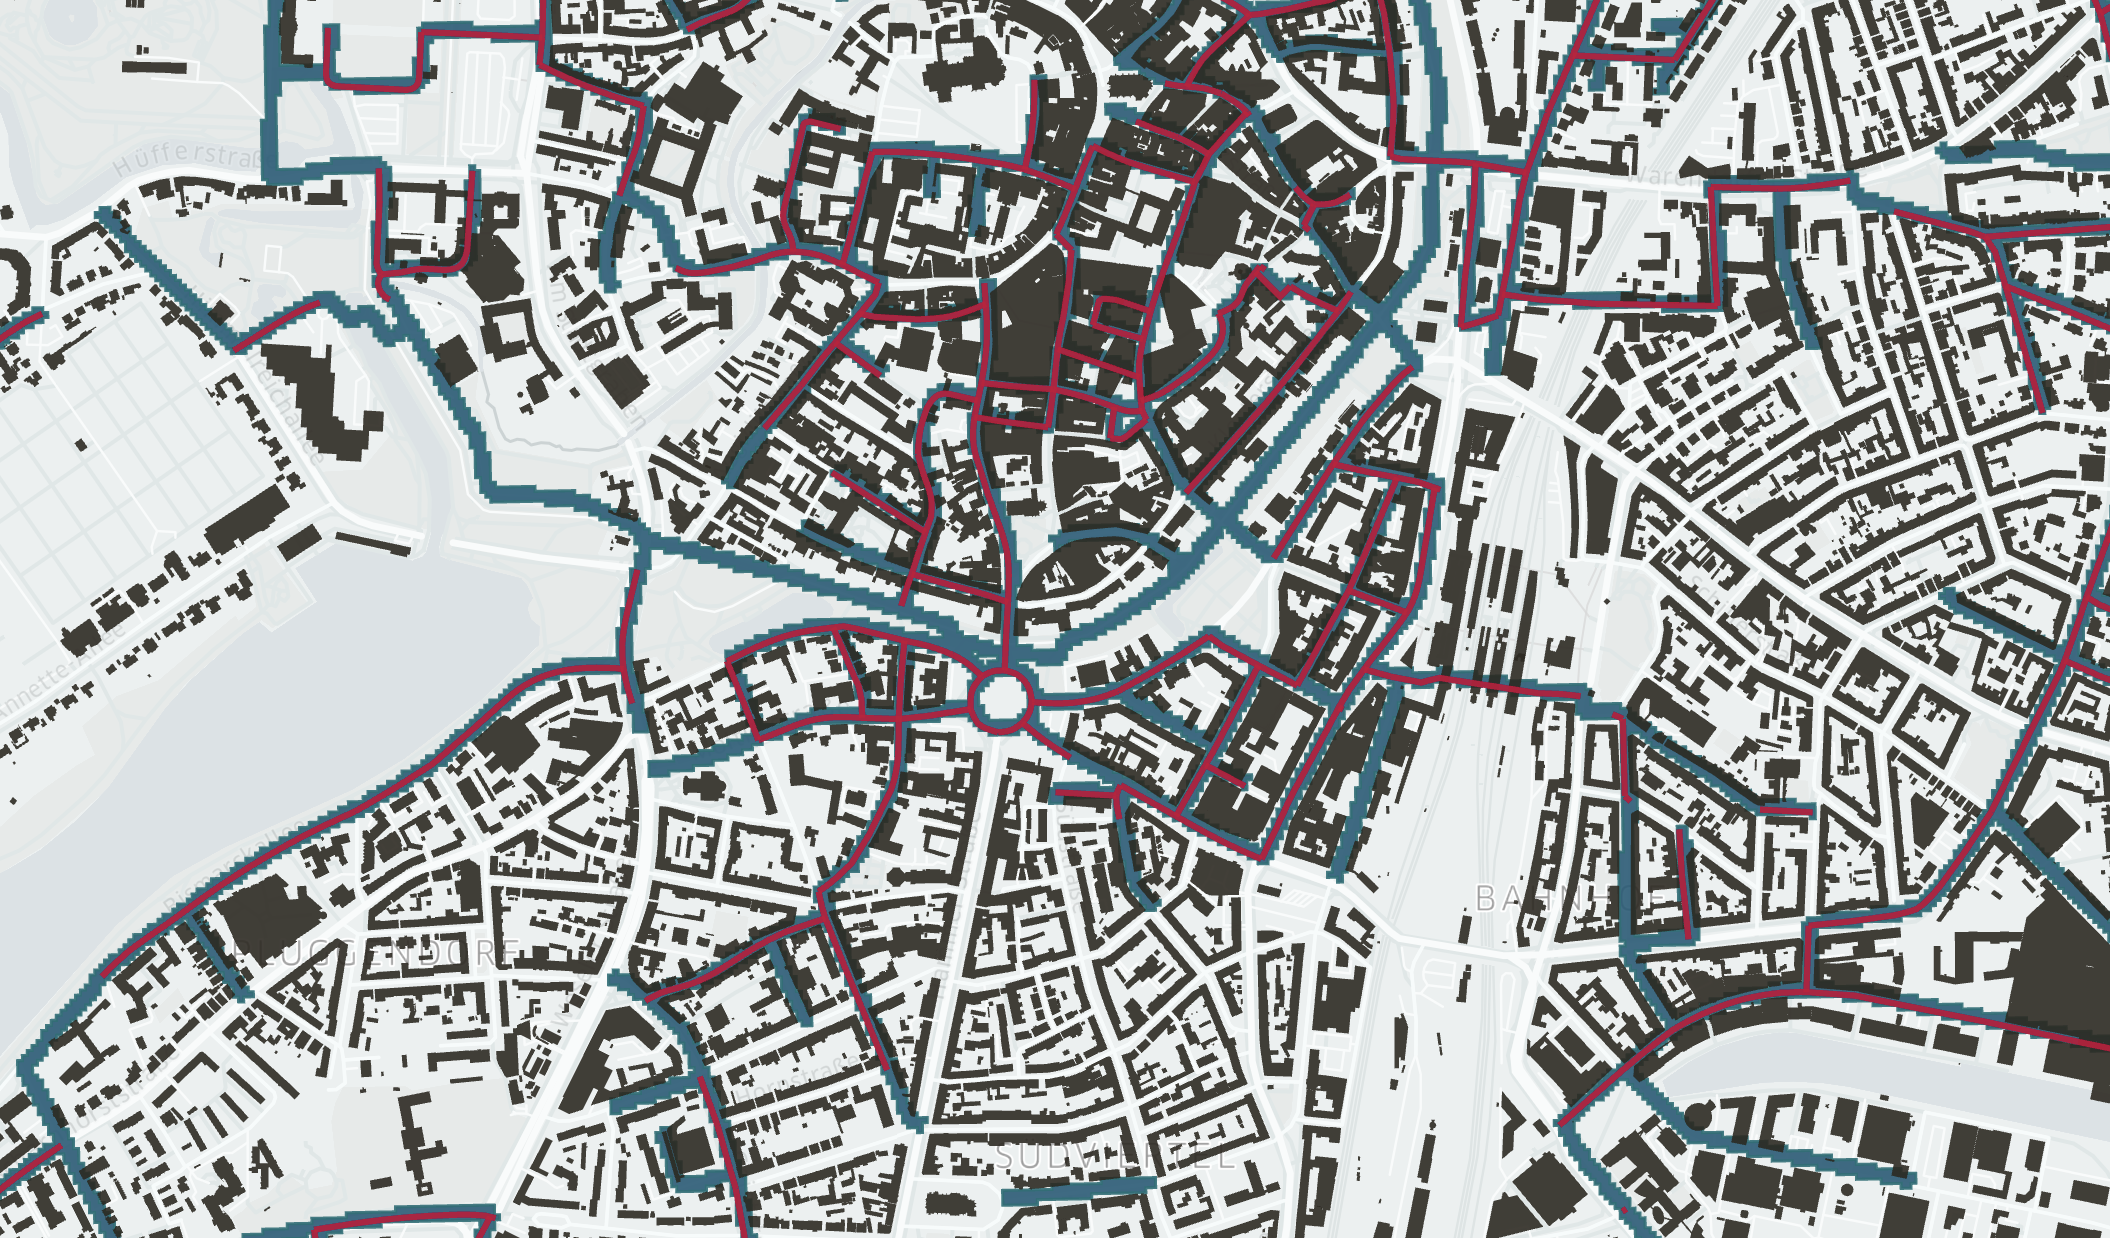

The Promenade has probaly no heat line

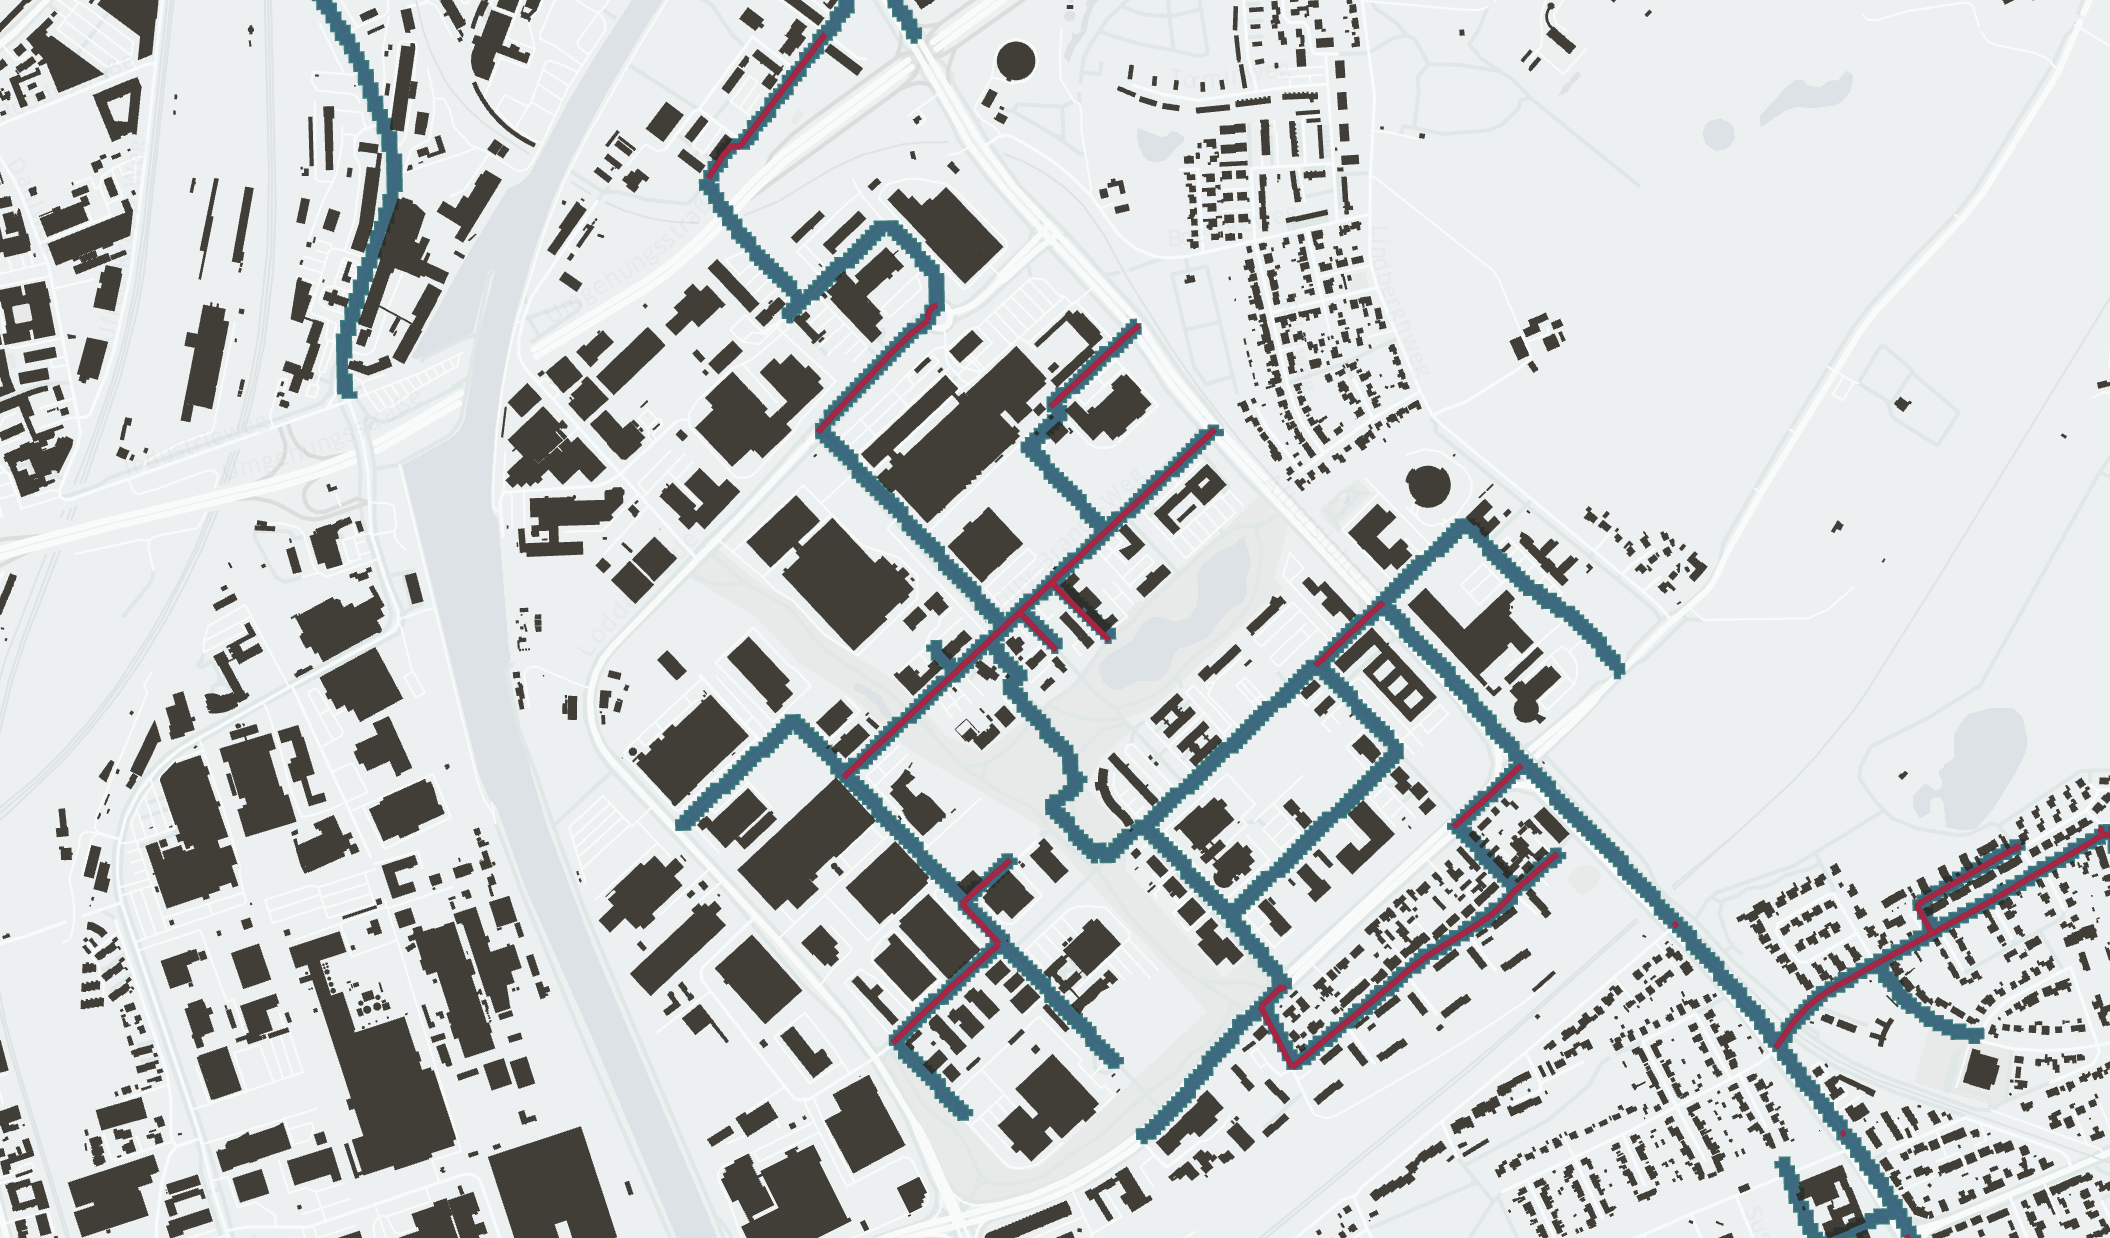

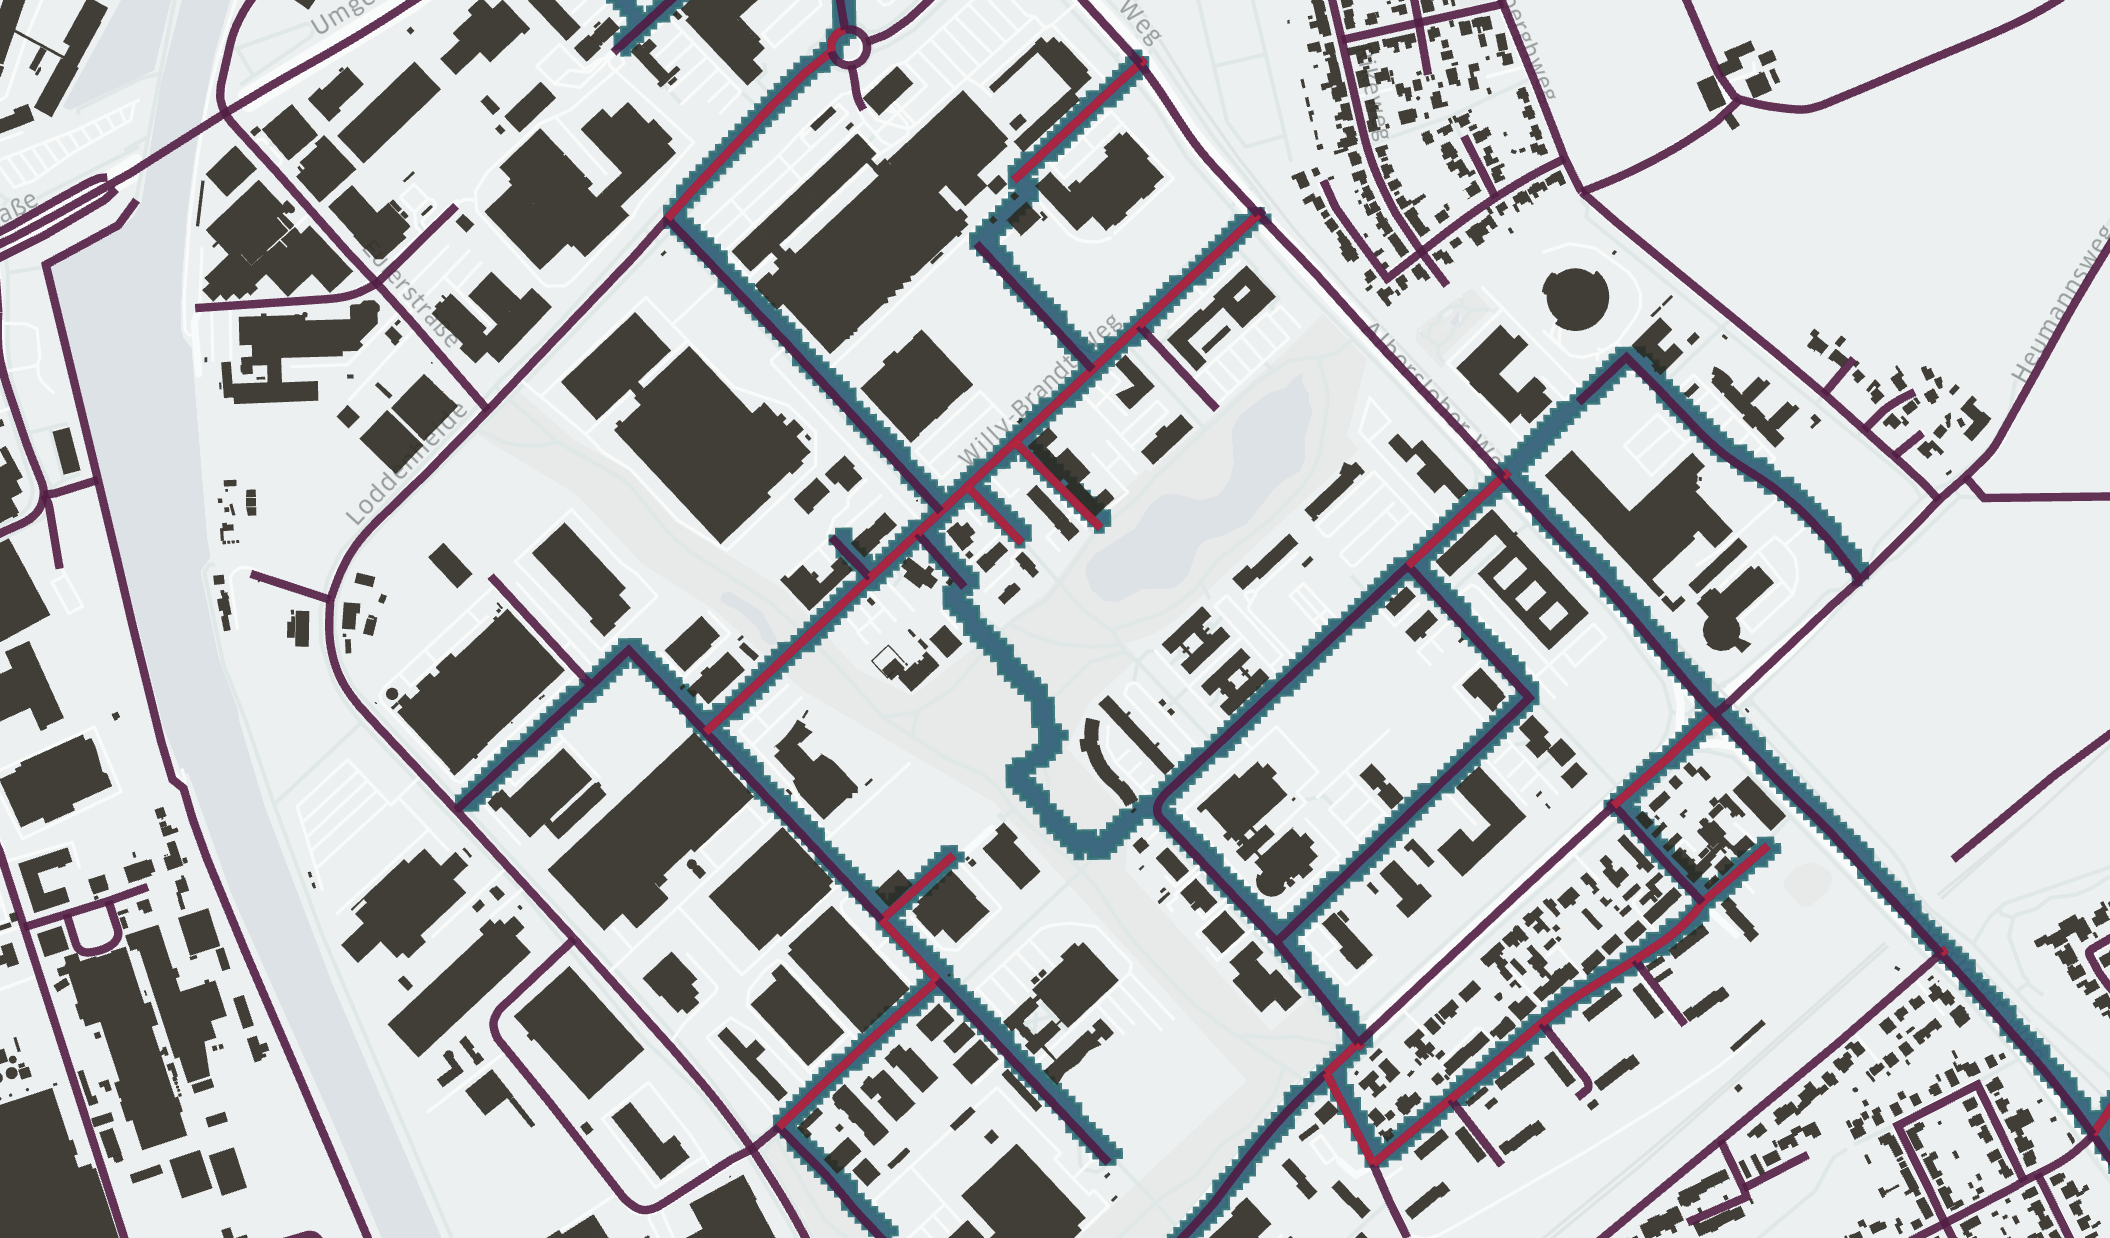